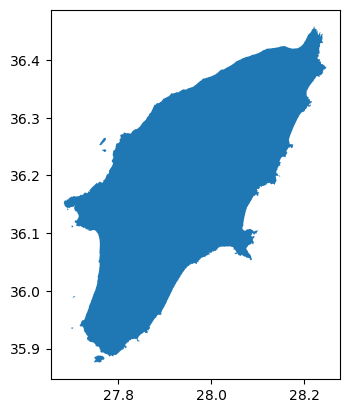

In [7]:
import geopandas as gpd
gdf_greece = gpd.read_file('data/gadm/ADM_ADM_3.gpkg')
#gdf_greece // Display data
# gdf_greece.plot()
# gdf_greece.explore()

gdf_rhodes = gdf_greece.loc[gdf_greece['NAME_3']=='Rhodos']
gdf_rhodes.plot()
gdf_rhodes.to_file('rhodes.gpkg')

In [14]:
#Getting vital infrastructure and built-up areas
gdf_roads = gpd.read_file('data/osm/osm_roads.gpkg', mask=gdf_rhodes)
# gdf_roads.explore()
# gdf_roads['fclass'].unique() // Types of roads
key_infra_labels = ['primary', 'secondary', 'tertiary']
key_infra = gdf_roads[gdf_roads['fclass'].isin(key_infra_labels)]
# key_infra.plot()
epsg_code = 32631
key_infra_meters = key_infra.to_crs(epsg_code)
key_infra_meters_buffer = key_infra_meters.buffer(100)
# key_infra_meters_buffer // GeoSeries Object
key_infra_buffer = key_infra_meters_buffer.to_crs(key_infra.crs)
# key_infra_buffer

def buffer_crs(gdf, size, meter_crs=32631, target_crs=4326):
    return gdf.to_crs(meter_crs).buffer(size).to_crs(target_crs)

key_infra_buffer_200 = buffer_crs(key_infra, 200)

<Axes: >

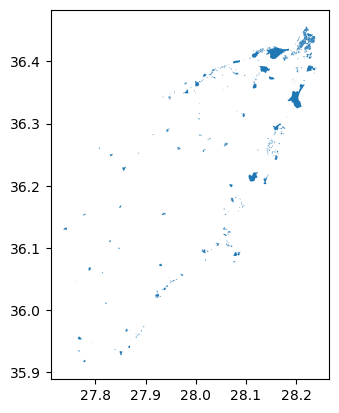

In [19]:
#Exercise 1
gdf_osm = gpd.read_file('data/osm/osm_landuse.gpkg', mask=gdf_rhodes)
key_infra_labels_osm = ['commercial', 'industrial', 'residential']
key_infra_osm = gdf_osm[gdf_osm['fclass'].isin(key_infra_labels_osm)]

key_infra_buffer_20 = buffer_crs(key_infra_osm, 20)
# key_infra_buffer_20
# gdf_osm

key_infra_buffer_20.plot()

#19 Unique land use types
#Only 1349 remain

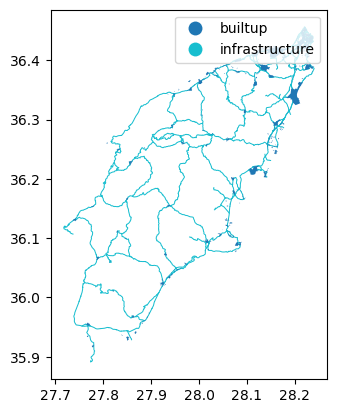

In [20]:
#Last part
import pandas as pd
data = {'geometry': key_infra_buffer, 'type': 'infrastructure', 'code': 1}
gdf_infra = gpd.GeoDataFrame(data)

data = {'geometry': key_infra_buffer_20, 'type': 'builtup', 'code': 2}
gdf_builtup = gpd.GeoDataFrame(data)

gdf_assets = pd.concat([gdf_infra, gdf_builtup]).reset_index(drop=True)
gdf_assets.plot(column='type', legend=True)
gdf_assets.to_file('assets.gpkg')